In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

%matplotlib inline

In [8]:
df = pd.read_csv('/Users/mana/projects/Lambda/build_week/DS-Unit-4/data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
df_n = df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','space', 'experiences_offered', 
                        'neighborhood_overview','notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 
                        'host_id', 'host_url', 'host_name', 'host_since','host_location', 'host_about', 'host_response_time',
                        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_thumbnail_url', 'host_picture_url', 
                        'host_neighbourhood','host_listings_count', 'host_total_listings_count','host_verifications', 
                        'host_has_profile_pic', 'host_identity_verified','street', 'neighbourhood_cleansed','neighbourhood_group_cleansed',
                        'state', 'zipcode', 'market','smart_location', 'country_code', 'country', 'latitude', 'longitude',
                        'is_location_exact', 'property_type', 'room_type', 'bed_type', 'square_feet', 'weekly_price', 'monthly_price', 
                        'security_deposit','cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 
                        'calendar_updated', 'has_availability','availability_30', 'availability_60', 'availability_90','availability_365', 
                        'calendar_last_scraped', 'number_of_reviews','first_review', 'last_review','review_scores_accuracy', 
                        'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 
                        'review_scores_value', 'requires_license','license', 'jurisdiction_names', 'instant_bookable','cancellation_policy', 
                        'require_guest_profile_picture','require_guest_phone_verification', 'calculated_host_listings_count',
                        'reviews_per_month', 'amenities', 'accommodates', 'neighbourhood', 'city', 'review_scores_rating'], inplace=True)

In [11]:
df.head()

,id,description,bathrooms,bedrooms,beds,price
0,241032,Make your self at home in this charming one-be...,1.0,1.0,1.0,$85.00
1,953595,Chemically sensitive? We've removed the irrita...,1.0,1.0,1.0,$150.00
2,3308979,New modern house built in 2013. Spectacular s...,4.5,5.0,7.0,$975.00
3,7421966,A charming apartment that sits atop Queen Anne...,1.0,0.0,2.0,$100.00
4,278830,Cozy family craftman house in beautiful neighb...,2.0,3.0,3.0,$450.00


In [12]:
#Correct datatype for price from str to int
df['price'] = pd.to_numeric(df['price'].map(lambda x: x.strip('$').replace(',','')))
print("price data type: ", type(df['price'].iloc[0]))

price data type:  <class 'numpy.float64'>


In [13]:
# imports
import nltk
nltk.download(['punkt', 'wordnet', 'stopwords'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import re

# define function tokenize

def tokenize(text):
    '''
    for text strings to be tokenized (tokens)
    removing stop words
    Lemmatization
    '''
    tokens = word_tokenize(text)
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [lemmatizer.lemmatize(w.lower().strip()) for w in tokens]
    
    return tokens

[nltk_data] Downloading package punkt to /Users/mana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['description'].value_counts(normalize=True)[:10]

Our space is a mix of a hostel and a home. We are a group of long-term residents & subletors who welcome short term guests. This is the house to meet folks whether you are moving to town or traveling through. The house offers quiet and social spaces. Our listing offers a unique Airbnb experience of staying with other Airbnb guests in a shared room as well as in a house of roommates who live in Seattle. This room is a great fit for individual or groups of travelers on a budget who are interested in meeting interesting people right in the place they are staying! We created this house so that people from around the world could meet, share experiences together and potentially create long lasting friendships that go beyond their time in our house. In a big house we are making the world smaller with more connections between people. Below is more information about your shared room, about us and about our house. Read through and see if we are a good fit for your trip! ABOUT YOUR SHARED ROOM:  

In [15]:
# Using the tokenize function
df['description'] = df['description'].apply(str)
df['base_tokens'] = df['description'].apply(tokenize)
df['base_tokens'].head()

0    [make, self, home, charming, onebedroom, apart...
1    [chemically, sensitive, weve, removed, irritan...
2    [new, modern, house, built, 2013, spectacular,...
3    [charming, apartment, sits, atop, queen, anne,...
4    [cozy, family, craftman, house, beautiful, nei...
Name: base_tokens, dtype: object

In [16]:
df[['description', 'base_tokens']][:10]

,description,base_tokens
0,Make your self at home in this charming one-be...,"[make, self, home, charming, onebedroom, apart..."
1,Chemically sensitive? We've removed the irrita...,"[chemically, sensitive, weve, removed, irritan..."
2,New modern house built in 2013. Spectacular s...,"[new, modern, house, built, 2013, spectacular,..."
3,A charming apartment that sits atop Queen Anne...,"[charming, apartment, sits, atop, queen, anne,..."
4,Cozy family craftman house in beautiful neighb...,"[cozy, family, craftman, house, beautiful, nei..."
5,We're renting out a small private unit of one ...,"[renting, small, private, unit, one, seattle, ..."
6,Enjoy a quiet stay in our comfortable 1915 Cra...,"[enjoy, quiet, stay, comfortable, 1915, crafts..."
7,"Our tiny cabin is private , very quiet and com...","[tiny, cabin, private, quiet, comfortable, spo..."
8,"Nestled in the heart of the city, this space i...","[nestled, heart, city, space, turn, century, c..."
9,"Beautiful apartment in an extremely safe, quie...","[beautiful, apartment, extremely, safe, quiet,..."


In [17]:
# Create a function which takes a corpus of document and returns a dataframe of word counts

from collections import Counter

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [18]:
wc = count(df['base_tokens'])
print(wc.shape)
wc.head()

(13084, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,seattle,2489,4831,1.0,0.013934,0.013934,0.651912
192,room,2049,4427,2.0,0.012769,0.026702,0.536668
30,bedroom,2061,3602,3.0,0.010389,0.037091,0.539811
73,downtown,2094,3092,4.0,0.008918,0.046009,0.548455
77,bed,1940,3046,5.0,0.008785,0.054795,0.508119


In [19]:
# pip install wordcloud

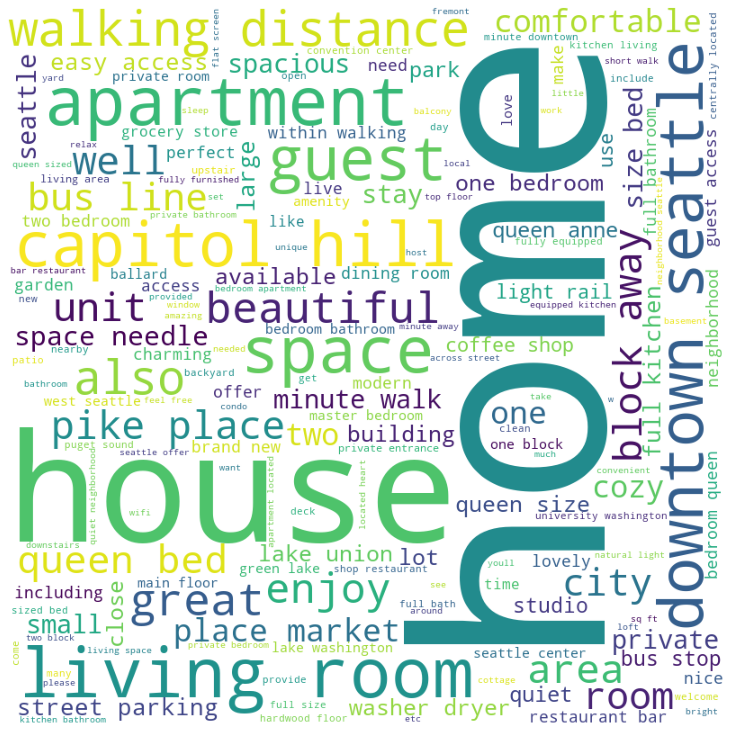

In [20]:
from wordcloud import WordCloud

comment_words = ''
stop_words = set(stopwords.words('english'))

for val in df.base_tokens:
    val = str(val)
    tokens = word_tokenize(val)
    tokens = re.sub('[^a-zA-Z 0-9]', '', val)
    tokens = tokens.lower().split()
    lemmatizer = WordNetLemmatizer()
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [lemmatizer.lemmatize(w.lower().strip()) for w in tokens]
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                     background_color='white',
                     stopwords = stop_words,
                     min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# initialize pipeline

# Create pipeline components
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
svm = LinearSVC()

# Get sparse dtm
dtm = vect.fit_transform(df.description)

# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.shape

pipe = Pipeline([
    ('vect', vect),
    ('clf', svm)
])

# split data and remove NA values
df.dropna(inplace=True)
X = df['description']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# pipeline fit
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
           

In [22]:
y_preds = pipe.predict(X_test)
y_preds

array([120.,  68.,  95., 150., 129., 130.,  99., 150.,  80.,  55.,  90.,
       250., 120.,  65., 125., 183.,  50., 126., 115., 150.,  95., 150.,
       100., 110.,  60., 110.,  80.,  85.,  85., 169.,  80., 105., 115.,
       125., 188., 110.,  80.,  75., 175.,  50., 165., 150.,  80.,  90.,
        50., 250.,  46.,  75.,  99.,  89., 150.,  50., 115., 250., 169.,
        99.,  75.,  75.,  85., 100., 100.,  99.,  95., 115., 129.,  75.,
       150., 150.,  95.,  75., 100.,  55., 100., 125., 125.,  80.,  90.,
        90.,  63.,  90.,  62., 175.,  80., 200.,  96., 300.,  69.,  85.,
       125., 150.,  95., 100., 100.,  90.,  80., 145.,  90., 110., 125.,
       150.,  60., 110.,  90.,  99.,  55., 150.,  50., 100.,  75.,  90.,
        60.,  90., 700.,  65., 175., 115., 150., 125., 165.,  95.,  55.,
        65.,  95., 125., 175., 100., 200.,  75.,  99.,  65.,  55., 100.,
       120., 175., 250.,  75.,  75., 399., 169., 100.,  70., 195., 125.,
        80.,  90.,  80.,  80., 150.,  48.,  99., 12

In [23]:
mse = mean_squared_error(y_test, y_preds)
mse

9085.707894736843

In [24]:
from math import sqrt
#root-mean-square deviation
rmse = sqrt(mse)
rmse

95.31897971934468

In [25]:
y_test.head(10)

2526    160.0
95      225.0
1530    149.0
3699     97.0
2012     90.0
3748     62.0
600      73.0
3660    140.0
998     300.0
424      65.0
Name: price, dtype: float64

In [26]:
r2 = r2_score(y_test, y_preds)
r2

0.03812312501965909

In [27]:
mae = mean_absolute_error(y_test, y_preds)
mae

51.57631578947368

In [28]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

target = df['price']

rfc = RandomForestClassifier()

pipe2 = Pipeline([('vect', vect), ('clf', rfc)])


parameters = {
    'vect__max_df': (0.7, 1.0),
    'vect__min_df': (.02, .05, .10),
    'vect__max_features':(500, 1500),
    'clf__n_estimators':(5, 10),
    'clf__max_depth':(5, 10, 15, 20)
}

grid_search = GridSearchCV(pipe2, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(df['description'], target)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [29]:
grid_search.best_score_

0.059536439914014284

In [30]:
grid_search.best_params_

{'clf__max_depth': 5,
 'clf__n_estimators': 5,
 'vect__max_df': 1.0,
 'vect__max_features': 500,
 'vect__min_df': 0.02}

In [31]:
from sklearn.metrics import accuracy_score

# Evaluate on test data
y_test = grid_search.predict(df.description)
accuracy_score(target, y_test)

0.08667017913593256

In [32]:
best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['clf']

In [33]:
!pip install eli5

In [34]:
import eli5

eli5.show_weights(clf, vec=vect, top=20)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0381 ± 0.0934,apartment
0.0348 ± 0.1390,fi
0.0282 ± 0.1128,shared
0.0257 ± 0.0643,time
0.0243 ± 0.0971,bedrooms
0.0234 ± 0.0628,near
0.0231 ± 0.0924,cable
0.0217 ± 0.0867,common
0.0209 ± 0.0629,kitchen
0.0207 ± 0.0830,basement


In [35]:
# Create dataframe containing price prediction per description

pred = grid_search.predict(df['description'])

In [36]:
#prediction price using description
df_pred = pd.DataFrame({'id': df['id'], 'description': df['description'], 'bathrooms': df['bathrooms'], 'bedrooms': df['bedrooms'],
                       'beds': df['beds'], 'price': df['price'], 'pred_price_using_desc': pred})
df_pred.head(30)


,id,description,bathrooms,bedrooms,beds,price,pred_price_using_desc
0,241032,Make your self at home in this charming one-be...,1.0,1.0,1.0,85.0,100.0
1,953595,Chemically sensitive? We've removed the irrita...,1.0,1.0,1.0,150.0,150.0
2,3308979,New modern house built in 2013. Spectacular s...,4.5,5.0,7.0,975.0,95.0
3,7421966,A charming apartment that sits atop Queen Anne...,1.0,0.0,2.0,100.0,100.0
4,278830,Cozy family craftman house in beautiful neighb...,2.0,3.0,3.0,450.0,150.0
5,5956968,We're renting out a small private unit of one ...,1.0,1.0,1.0,120.0,85.0
6,1909058,Enjoy a quiet stay in our comfortable 1915 Cra...,1.0,1.0,1.0,80.0,150.0
7,856550,"Our tiny cabin is private , very quiet and com...",1.0,1.0,1.0,60.0,60.0
8,4948745,"Nestled in the heart of the city, this space i...",1.0,1.0,1.0,90.0,75.0
9,2493658,"Beautiful apartment in an extremely safe, quie...",1.0,1.0,1.0,150.0,150.0


In [37]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df_pred['polarity_value']="Default"
df_pred['neg']=0.0
df_pred['pos']=0.0
df_pred['neu']=0.0
df_pred['compound']=0.0
for index,row in df_pred.iterrows():
    ss = sid.polarity_scores(row['description'])
    df_pred.at[index,'polarity_value'] = ss
    df_pred.at[index,'neg'] = ss['neg']
    df_pred.at[index,'pos'] = ss['pos']
    df_pred.at[index,'neu']= ss['neu']
    df_pred.at[index,'compound'] = ss['compound']
df_pred.head()

,id,description,bathrooms,bedrooms,beds,price,pred_price_using_desc,polarity_value,neg,pos,neu,compound
0,241032,Make your self at home in this charming one-be...,1.0,1.0,1.0,85.0,100.0,"{'neg': 0.029, 'neu': 0.895, 'pos': 0.076, 'co...",0.029,0.076,0.895,0.8439
1,953595,Chemically sensitive? We've removed the irrita...,1.0,1.0,1.0,150.0,150.0,"{'neg': 0.082, 'neu': 0.606, 'pos': 0.312, 'co...",0.082,0.312,0.606,0.9926
2,3308979,New modern house built in 2013. Spectacular s...,4.5,5.0,7.0,975.0,95.0,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.000,0.123,0.877,0.9665
3,7421966,A charming apartment that sits atop Queen Anne...,1.0,0.0,2.0,100.0,100.0,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.000,0.140,0.860,0.6369
4,278830,Cozy family craftman house in beautiful neighb...,2.0,3.0,3.0,450.0,150.0,"{'neg': 0.015, 'neu': 0.856, 'pos': 0.129, 'co...",0.015,0.129,0.856,0.9689


In [39]:
# split data

X = df['description']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
type(X)

pandas.core.series.Series

In [41]:
X_test

3172    This updated lower Queen Anne townhouse is clo...
2922    * We're currently not taking new guests from O...
410     At last, our tools are put away and our carria...
2422    Conveniently located. Closed to all Seattle la...
929     This 1903 Victorian on Cherry Hill has a super...
                              ...                        
2178    Spacious guest unit perfect for groups (6+ see...
612     Cozy 2 bedroom corner lot home in the Central ...
2350    Seattle's most diverse neighborhood full of ar...
2579    A welcoming urban retreat, with a pillow-top q...
3119    Beautiful and comfortable garden home, with fi...
Name: description, Length: 760, dtype: object

In [38]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on validation
print ('Accruacy', pipeline.score(X_test, y_test))

# Predict on test
y_pred = pipeline.predict(X_test)

Accruacy 0.05


In [39]:
X_test

2624    *****  Please Note this is our Winter/ Holiday...
2840    Very close to Seattle downtown walking distanc...
973     Breathtaking sunrises are seen from this room ...
1044    This space can accommodate guests wanting acce...
2371    Welcome to this newly remodeled townhome w/ 1 ...
                              ...                        
3290    This bright and sunny apartment with garden pa...
69      Quite and comfy room for two with private bath...
1095    This is a tastefully and simply furnished one-...
369     Enjoy the tranquility of this floating home wi...
2744    This centrally located Capitol Hill apartment ...
Name: description, Length: 760, dtype: object

In [44]:
# Save Model File

import pickle

filename = 'finalized_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

NameError: name 'pipeline' is not defined

In [49]:
filename = '/Users/mana/projects/Lambda/build_week/DS-Unit-3/notebooks/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Us

In [50]:
loaded_model

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['description'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    r

In [51]:
import pandas as pd
description = "Our space is a mix of a hostel and a home."
y = [description]
x = ['description'] # Series
df_new = pd.DataFrame(y, columns= x)

In [52]:
pred = loaded_model.predict(df_new['description'])

In [53]:
pred

array([100.])

In [54]:
pred = loaded_model.predict(X_test)

In [55]:
pred

array([240., 150., 100.,  59.,  87.,  99., 100., 100.,  50., 122., 100.,
        85.,  90.,  79., 100., 175., 100.,  97.,  90., 150., 129.,  87.,
        99., 100.,  42., 179., 100.,  50.,  85.,  95., 109., 109., 100.,
       195., 142.,  95., 170., 195.,  55.,  60.,  97.,  75.,  95., 200.,
       100., 200.,  95.,  58.,  65., 399., 110., 165., 218., 110., 143.,
        95., 100., 100.,  95.,  85., 250.,  65., 179., 100.,  98., 100.,
        75., 110.,  80., 100.,  55., 139., 100.,  97., 125., 150., 135.,
        59., 260.,  95., 130., 185., 350., 100.,  69., 100., 100., 100.,
       169., 160., 126., 100., 100., 100.,  59.,  75.,  64.,  46.,  55.,
        55., 270., 200., 127., 115.,  75., 150., 165.,  95.,  85.,  99.,
        85., 225.,  95., 100., 100., 200., 245.,  96.,  99.,  60.,  35.,
       100.,  49., 121., 100., 115.,  95., 220.,  80., 139., 400., 100.,
       100., 125.,  49.,  55.,  75., 100.,  50., 100.,  75.,  67., 125.,
       125., 128., 180.,  52., 200., 200., 330., 10

In [43]:
pip install -v scikit-learn==0.22.1

Non-user install because site-packages writeable
Created temporary directory: /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-ephem-wheel-cache-gjq2hjmg
Created temporary directory: /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-req-tracker-j962cr_f
Initialized build tracking at /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-req-tracker-j962cr_f
Created build tracker: /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-req-tracker-j962cr_f
Entered build tracker: /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-req-tracker-j962cr_f
Created temporary directory: /private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-install-1saao3ou
1 location(s) to search for versions of scikit-learn:
* https://pypi.org/simple/scikit-learn/
Fetching project page and analyzing links: https://pypi.org/simple/scikit-learn/
Getting page https://pypi.org/simple/scikit-learn/
Found index url https://pypi.org/simple
Getting credentials from key

  Skipping link: none of the wheel's tags match: cp35-cp35m-win_amd64: https://files.pythonhosted.org/packages/78/0e/2f1150f80c871bd03ed439e45a4fc6686b61c961aba8ba6773fece0674a7/scikit_learn-0.18rc2-cp35-cp35m-win_amd64.whl#sha256=9d432d8010d972d22d4ae3ce5fdb3ecdd15e80f4a53c8c458448c445535b1e2f (from https://pypi.org/simple/scikit-learn/)
  Found link https://files.pythonhosted.org/packages/91/cf/9a1fe9d70e8fefe4f325a439a6380cd7059d1af8baa646519f4b0473b879/scikit-learn-0.18.tar.gz#sha256=240009789d6495240b332e059cbd2499f4d2981c93873983c9e1d5189f90315f (from https://pypi.org/simple/scikit-learn/), version: 0.18
  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/d1/72/aa9fceabd0b1514d93f6e051924ade0afbf3704b9352823aedda7ec77db9/scikit-learn-0.18.win-amd64-py2.7.exe#sha256=417f04786284283caaf676927d610a13b9f68791d33ec262ee2563f89229c7b9 (from https://pypi.org/simple/scikit-learn/)
  Skipping link: unsupported archive format: .exe: https://files.pyth

  Skipping link: none of the wheel's tags match: cp34-cp34m-manylinux1_x86_64: https://files.pythonhosted.org/packages/cd/35/9eb69f2540882ce90e2776a3b201b6e59f3aae869df0fb11f33c39c59bd6/scikit_learn-0.19.2-cp34-cp34m-manylinux1_x86_64.whl#sha256=f1428af5c381f6eef30ffbc7e047b7c713d4efa5d7bf5e57b62b3fc8d387044b (from https://pypi.org/simple/scikit-learn/)
  Skipping link: none of the wheel's tags match: cp34-cp34m-win32: https://files.pythonhosted.org/packages/c6/82/4b7f3e10e0924d53606423bf043fbf6dcd4d7e3810f4de5feaed6bec5003/scikit_learn-0.19.2-cp34-cp34m-win32.whl#sha256=9ebb38ab1d0ee143982aed561811903ac6c1abb512ae2b9019b3b65bde63ffb9 (from https://pypi.org/simple/scikit-learn/)
  Skipping link: none of the wheel's tags match: cp34-cp34m-win_amd64: https://files.pythonhosted.org/packages/0e/80/dc650ba50b7440759884eb1ce08c655f88e9bf85d22cc68367f67504937e/scikit_learn-0.19.2-cp34-cp34m-win_amd64.whl#sha256=b3dc88c4d2bcb26ffc5afe16d053ae28317d7d1de083651defcd5453a04f1563 (from https://pyp

  Skipping link: none of the wheel's tags match: cp35-cp35m-win_amd64: https://files.pythonhosted.org/packages/d3/fa/b50821115c16e9b8ca307d3788e3dd1ec71cade3e564953ed7330a1fa3e0/scikit_learn-0.20.3-cp35-cp35m-win_amd64.whl#sha256=4705073de7bbcc6b9cd2f24dc9189aa8d3935e8621d3e65546c4b7fee9a042bf (from https://pypi.org/simple/scikit-learn/)
  Skipping link: none of the wheel's tags match: cp36-cp36m-macosx_10_10_intel, cp36-cp36m-macosx_10_10_x86_64, cp36-cp36m-macosx_10_6_intel, cp36-cp36m-macosx_10_9_intel, cp36-cp36m-macosx_10_9_x86_64: https://files.pythonhosted.org/packages/7e/90/bfe484adb16cdad078967b2b480517ec6c1180137e26fb4b015bcb090226/scikit_learn-0.20.3-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl#sha256=9f3e08dbd3f2f574913faba9b48d3c24a43fcc0eb14a0e962431005434b9cfe6 (from https://pypi.org/simple/scikit-learn/)
  Skipping link: none of the wheel's tags match: cp36-cp36m-manylinux1_i686: https://files.pythonhosted.

  Skipping link: none of the wheel's tags match: cp37-cp37m-macosx_10_6_intel: https://files.pythonhosted.org/packages/fb/16/293eefeb544fc091890df0be612f59095319cc91ccade8a91cc41df8625f/scikit_learn-0.22rc3-cp37-cp37m-macosx_10_6_intel.whl#sha256=984e253b3b13a39b8b1d2fa9c569eb853a1315f046216b0da40456d5608872b2 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5)
  Skipping link: none of the wheel's tags match: cp37-cp37m-manylinux1_i686: https://files.pythonhosted.org/packages/db/a4/a8f5d2d31e7236cca0a2d956839553caea25c45efcb3d5ccfb4fe1d89a8f/scikit_learn-0.22rc3-cp37-cp37m-manylinux1_i686.whl#sha256=38b053b1bc09f061fb52d6f7844c942d6a2c50cb54d5f2a63bcb7bee73c25bd9 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.5)
  Skipping link: none of the wheel's tags match: cp37-cp37m-manylinux1_x86_64: https://files.pythonhosted.org/packages/2f/05/b16d7b3c0e28656736b3d4de7d4fcd336be3dafd50d93ec75acf0c98bd86/scikit_learn-0.22rc3-cp37-cp37m-manylinux1_x86_64.whl#sh

  Skipping link: none of the wheel's tags match: cp38-cp38-manylinux1_x86_64: https://files.pythonhosted.org/packages/7f/c1/e19f767594035028b6ab88010742300ce5fcbdfeff051fc9afffcbebf644/scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl#sha256=5ce7a8021c9defc2b75620571b350acc4a7d9763c25b7593621ef50f3bd019a2 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.6)
  Skipping link: none of the wheel's tags match: cp38-cp38-win32: https://files.pythonhosted.org/packages/f4/f1/eb2c04ec65461cbf292293908d8cddc05dadce164f94b45345cc4807f812/scikit_learn-0.23.2-cp38-cp38-win32.whl#sha256=0d39748e7c9669ba648acf40fb3ce96b8a07b240db6888563a7cb76e05e0d9cc (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.6)
  Skipping link: none of the wheel's tags match: cp38-cp38-win_amd64: https://files.pythonhosted.org/packages/d6/04/ea17391926a03db3dd7c41d2090b7f4394b3be4be55fef49d6a5a6f3d796/scikit_learn-0.23.2-cp38-cp38-win_amd64.whl#sha256=1b8a391de95f6285a2f9adffb7db089271895095

  https://files.pythonhosted.org:443 "GET /packages/5a/5b/520ed622a1896ac320c19fe8f32ae13258ec72d884e8c6c9753e2b60197e/scikit_learn-0.22.1-cp38-cp38-macosx_10_9_x86_64.whl HTTP/1.1" 200 6995361
     |████████████████████████████████| 7.0 MB 4.1 MB/s eta 0:00:01  Ignoring unknown cache-control directive: immutable
  Updating cache with response from "https://files.pythonhosted.org/packages/5a/5b/520ed622a1896ac320c19fe8f32ae13258ec72d884e8c6c9753e2b60197e/scikit_learn-0.22.1-cp38-cp38-macosx_10_9_x86_64.whl"
  Caching due to etag
     |████████████████████████████████| 7.0 MB 4.1 MB/s 
  Added scikit-learn==0.22.1 from https://files.pythonhosted.org/packages/5a/5b/520ed622a1896ac320c19fe8f32ae13258ec72d884e8c6c9753e2b60197e/scikit_learn-0.22.1-cp38-cp38-macosx_10_9_x86_64.whl#sha256=571476fbb826c87ad300a5aad0238c14a590ab7df5cb823ee19ac077bf13b5f4 to build tracker '/private/var/folders/68/xk0bk1cx42l40_r906spymnc0000gn/T/pip-req-tracker-j962cr_f'
  Removed scikit-learn==0.22.1 from https

In [56]:
pip list

Package                            Version
---------------------------------- ----------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
basemap                            1.2.1
beautifulsoup4            

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python -v

import _frozen_importlib # frozen
import _imp # builtin
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import '_warnings' # <class '_frozen_importlib.BuiltinImporter'>
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
import '_frozen_importlib_external' # <class '_frozen_importlib.FrozenImporter'>
import '_io' # <class '_frozen_importlib.BuiltinImporter'>
import 'marshal' # <class '_frozen_importlib.BuiltinImporter'>
import 'posix' # <class '_frozen_importlib.BuiltinImporter'>
import _thread # previously loaded ('_thread')
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import _weakref # previously loaded ('_weakref')
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# installing zipimport hook
import 'time' # <class '_frozen_importlib.BuiltinImporter'>
import 'zipimport' # <class '_frozen_importlib.FrozenImporter'>
# installed zipimport hook
# /opt/anaconda3/lib/python3.8/encodings/__pycache__/__init__.cpython-38.pyc matches /

>>> 

In [ ]:
#python 3.8.3